# Logistic Regression

This file will deals with basics of **Logistic Regression** and implemented in *Python*.

->It is basically a supervised classification algorithm.

->In classificatioon problems,the target variables(or output) **y** can take only discrete values for given set of features(or inputs),**X**.

->Just like Linear regression assumes that the data follows a linear function, Logistic regression models the data using the sigmoid function.

**g(Z)=1/(1+e^-z)**

*The decision for the value of the threshold value is affected by the **Precision and recall** .*

1)**Low Precision/High Recall**: In applications where we want to reduce the number of false negatives without necessarily reducing the number false positives.

2)**High Precision/Low Recall**: In applications where we want to reduce the number of false positives without necessarily reducing the number false negatives.

It is classify into 3 types:

(a)**Binomial**:-target value can have only 2 values ie **"0"** , **"1"**.

(b)**multinominal**:-target value can have 3 or more possible types(not ordered).

(c)**ordinal**:- it deals with target variables with ordered categories.


# Binomial Logistic Regression 

**Project details**

***The number of hours of study for getting passed(1) or failed(0)***

In [14]:
#importing package
import csv
import numpy as np
import matplotlib.pyplot as plt


In [20]:
def loadCSV(study): 
    ''' 
    function to load dataset 
    '''
    with open(study,"r") as csvfile: 
        lines = csv.reader(csvfile) 
        dataset = list(lines) 
        for i in range(len(dataset)): 
            dataset[i] = [float(x) for x in dataset[i]]      
    return np.array(dataset) 
  
  
def normalize(X): 
    ''' 
    function to normalize feature matrix, X 
    '''
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X 
  
  
def logistic_func(beta, X): 
    ''' 
    logistic(sigmoid) function 
    '''
    return 1.0/(1 + np.exp(-np.dot(X, beta.T))) 
  
  
def log_gradient(beta, X, y): 
    ''' 
    logistic gradient function 
    '''
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1) 
    final_calc = np.dot(first_calc.T, X) 
    return final_calc 
  
  
def cost_func(beta, X, y): 
    ''' 
    cost function, J 
    '''
    log_func_v = logistic_func(beta, X) 
    y = np.squeeze(y) 
    step1 = y * np.log(log_func_v) 
    step2 = (1 - y) * np.log(1 - log_func_v) 
    final = -step1 - step2 
    return np.mean(final) 
  
  
def grad_desc(X, y, beta, lr=.01, converge_change=.001): 
    ''' 
    gradient descent function 
    '''
    cost = cost_func(beta, X, y) 
    change_cost = 1
    num_iter = 1
      
    while(change_cost > converge_change): 
        old_cost = cost 
        beta = beta - (lr * log_gradient(beta, X, y)) 
        cost = cost_func(beta, X, y) 
        change_cost = old_cost - cost 
        num_iter += 1
      
    return beta, num_iter  
  
  
def pred_values(beta, X): 
    ''' 
    function to predict labels 
    '''
    pred_prob = logistic_func(beta, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 
  
  
def plot_reg(X, y, beta): 
    ''' 
    function to plot decision boundary 
    '''
    # labelled observations 
    x_0 = X[np.where(y == 0.0)] 
    x_1 = X[np.where(y == 1.0)] 
      
    # plotting points with diff color for diff label 
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0') 
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1') 
      
    # plotting decision boundary 
    x1 = np.arange(0, 1, 0.1) 
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2] 
    plt.plot(x1, x2, c='k', label='reg line') 
  
    plt.xlabel('x1') 
    plt.ylabel('x2') 
    plt.legend() 
    plt.show()

Estimated regression coefficients: [[  1.70474504  15.04062212 -20.47216021]]
No. of iterations: 2612
Correctly predicted labels: 100


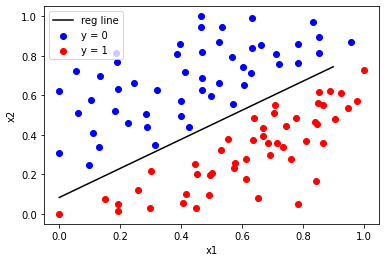

In [21]:
if __name__ == "__main__": 
    # load the dataset 
    dataset = loadCSV('study.csv') 
      
    # normalizing feature matrix 
    X = normalize(dataset[:, :-1]) 
      
    # stacking columns wth all ones in feature matrix 
    X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X)) 
  
    # response vector 
    y = dataset[:, -1] 
  
    # initial beta values 
    beta = np.matrix(np.zeros(X.shape[1])) 
  
    # beta values after running gradient descent 
    beta, num_iter = grad_desc(X, y, beta) 
  
    # estimated beta values and number of iterations 
    print("Estimated regression coefficients:", beta) 
    print("No. of iterations:", num_iter) 
  
    # predicted labels 
    y_pred = pred_values(beta, X) 
      
    # number of correctly predicted labels 
    print("Correctly predicted labels:", np.sum(y == y_pred)) 
      
    # plotting regression line 
    plot_reg(X, y, beta)